<a href="https://colab.research.google.com/github/FlorMauves/ProyectoDS_StudentDepression_MauvesinTogel/blob/main/ProyectoDS_StudenDepression_MauvesinTogel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Abstract

Este proyecto se centra en el análisis exploratorio de un dataset relacionado con la salud mental de estudiantes, específicamente orientado a la detección de depresión. El conjunto de datos, proveniente de Kaggle y cargado en un repositorio público de GitHub, reúne información demográfica, académica, laboral y de estilo de vida de estudiantes, incluyendo variables como género, edad, ciudad, nivel de presión académica y laboral, satisfacción con el estudio, duración del sueño, hábitos alimenticios, y antecedentes familiares de enfermedades mentales. La variable objetivo indica si el estudiante atraviesa un cuadro depresivo (sí/no).

## Objetivo

El objetivo de este análisis preliminar es identificar patrones, relaciones y características relevantes dentro de los datos que puedan estar asociados a la depresión estudiantil. Para ello, se plantean hipótesis específicas que guían la exploración, tales como la relación entre el nivel de satisfacción académica y la depresión, el impacto del estrés financiero y la cantidad de horas de estudio o trabajo.

Se utilizarán herramientas de visualización en Python, como Matplotlib y Seaborn, combinadas con estadísticas descriptivas para generar insights iniciales. Los gráficos univariados, permitirán analizar el comportamiento de las variables y su relación con el estado depresivo, así como identificar valores atípicos o ausentes que puedan afectar el futuro modelado.

Este análisis exploratorio busca sentar las bases para el desarrollo de un modelo supervisado de predicción de depresión en estudiantes. A través del uso de técnicas de ciencia de datos, se aspira a comprender mejor qué factores influyen en el bienestar psicológico de los estudiantes.

### Fuente
[Fuente de Kaggle](https://www.kaggle.com/datasets/adilshamim8/student-depression-dataset)

[Repositorio GitHub](https://github.com/FlorMauves/ProyectoDS_StudentDepression_MauvesinTogel)

#Preguntas e Hipótesis de interés

* ¿Influyen el estrés financiero y la presión académica en la probabilidad de
tener depresión?
Hipótesis: Los estudiantes con mayor estrés financiero y presión académica presentan una mayor proporción de casos de depresión.

* ¿Existe una relación entre la duración del sueño y la depresión?
Hipótesis: Menores horas de sueño se asocian a un aumento en los casos de depresión.

* ¿Qué combinación de hábitos de vida (sueño, dieta y horas de estudio/trabajo) se vinculan con mayores tasas de depresión?
Hipótesis: Hábitos poco saludables (poco sueño, dieta deficiente, muchas horas de trabajo) se relacionan con una mayor prevalencia de depresión.

* ¿Influyen la satisfacción con el estudio o el trabajo en la salud mental del estudiante?
Hipótesis: A menor satisfacción académica o laboral, mayor probabilidad de presentar síntomas depresivos.

* ¿Los antecedentes familiares de enfermedades mentales están fuertemente asociados a la depresión estudiantil?
Hipótesis: La presencia de antecedentes familiares aumenta significativamente la probabilidad de depresión.






In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/FlorMauves/ProyectoDS_StudentDepression_MauvesinTogel/refs/heads/main/student_depression_dataset.csv"
df = pd.read_csv(url)

In [ ]:
# Primer vistazo al dataset
print(df.head())


   id  Gender   Age           City Profession  Academic Pressure  \
0   2    Male  33.0  Visakhapatnam    Student                5.0   
1   8  Female  24.0      Bangalore    Student                2.0   
2  26    Male  31.0       Srinagar    Student                3.0   
3  30  Female  28.0       Varanasi    Student                3.0   
4  32  Female  25.0         Jaipur    Student                4.0   

   Work Pressure  CGPA  Study Satisfaction  Job Satisfaction  \
0            0.0  8.97                 2.0               0.0   
1            0.0  5.90                 5.0               0.0   
2            0.0  7.03                 5.0               0.0   
3            0.0  5.59                 2.0               0.0   
4            0.0  8.13                 3.0               0.0   

        Sleep Duration Dietary Habits   Degree  \
0          '5-6 hours'        Healthy  B.Pharm   
1          '5-6 hours'       Moderate      BSc   
2  'Less than 5 hours'        Healthy       BA   
3     

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [ ]:
print("\nResumen estadístico:")
print(df.describe(include="all"))


Resumen estadístico:
                   id Gender           Age    City Profession  \
count    27901.000000  27901  27901.000000   27901      27901   
unique            NaN      2           NaN      52         14   
top               NaN   Male           NaN  Kalyan    Student   
freq              NaN  15547           NaN    1570      27870   
mean     70442.149421    NaN     25.822300     NaN        NaN   
std      40641.175216    NaN      4.905687     NaN        NaN   
min          2.000000    NaN     18.000000     NaN        NaN   
25%      35039.000000    NaN     21.000000     NaN        NaN   
50%      70684.000000    NaN     25.000000     NaN        NaN   
75%     105818.000000    NaN     30.000000     NaN        NaN   
max     140699.000000    NaN     59.000000     NaN        NaN   

        Academic Pressure  Work Pressure          CGPA  Study Satisfaction  \
count        27901.000000   27901.000000  27901.000000        27901.000000   
unique                NaN            NaN 

In [ ]:
# Revisar valores faltantes por columna
print(df.isnull().sum())

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         0
Family History of Mental Illness         0
Depression                               0
dtype: int64


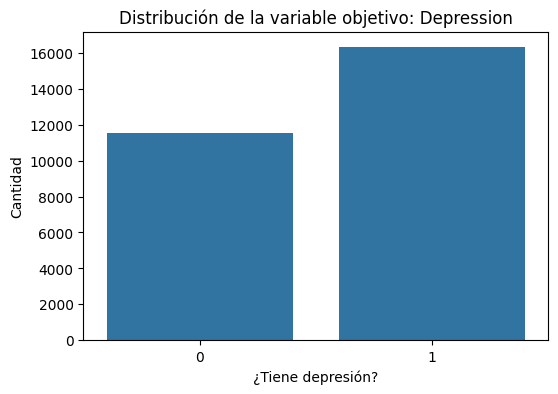

In [33]:
# Distribución de la variable objetivo
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Depression")
plt.title("Distribución de la variable objetivo: Depression")
plt.xlabel("¿Tiene depresión?")
plt.ylabel("Cantidad")
plt.show()

In [ ]:
# Ver tipos de datos categóricos y numéricos
cat_vars = df.select_dtypes(include=["object"]).columns.tolist()
num_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

print("Variables categóricas:", cat_vars)
print("Variables numéricas:", num_vars)

Variables categóricas: ['Gender', 'City', 'Profession', 'Sleep Duration', 'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?', 'Financial Stress', 'Family History of Mental Illness']
Variables numéricas: ['id', 'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction', 'Work/Study Hours', 'Depression']


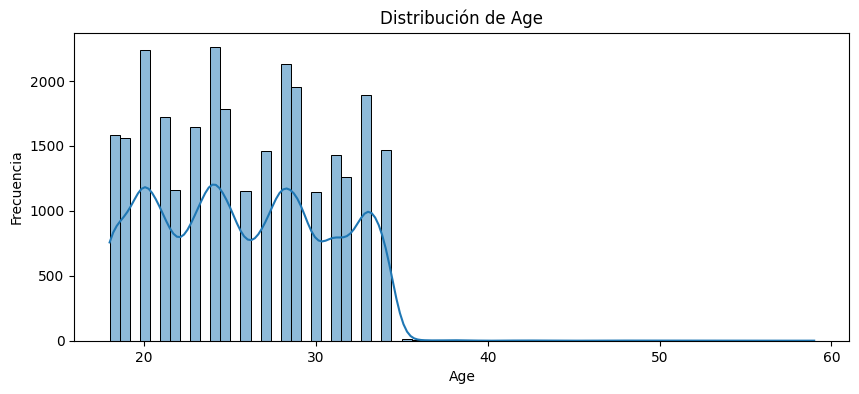

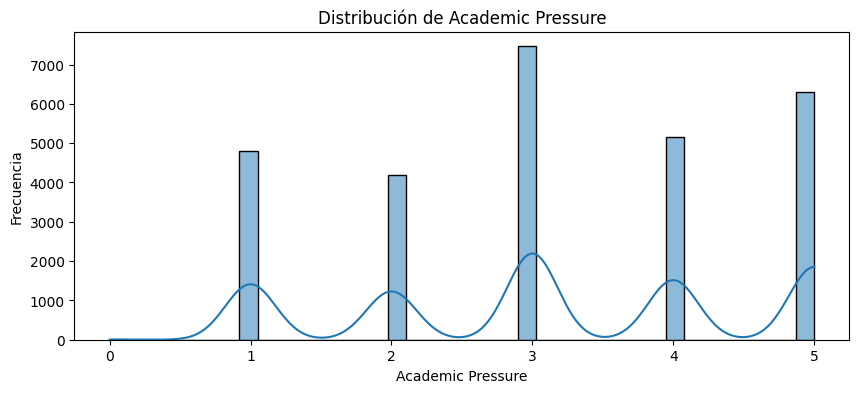

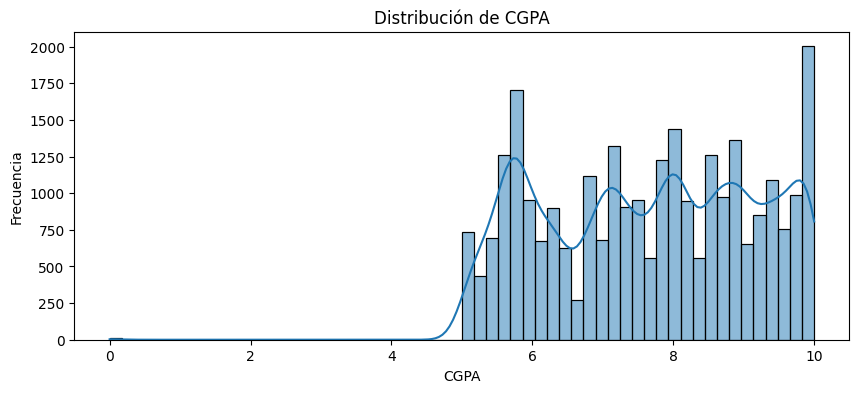

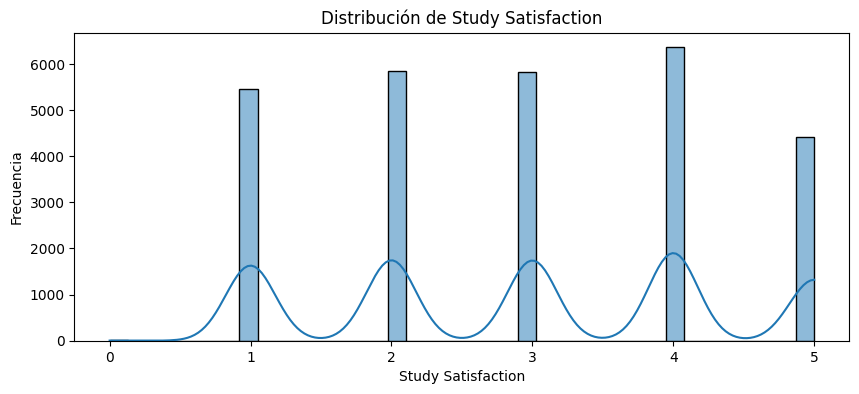

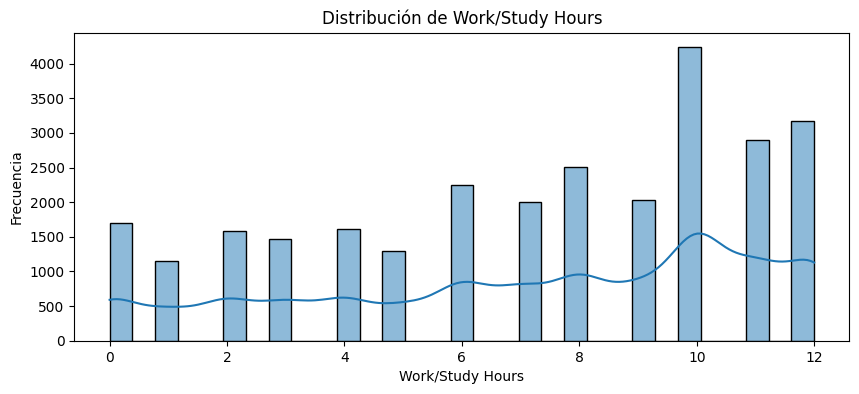

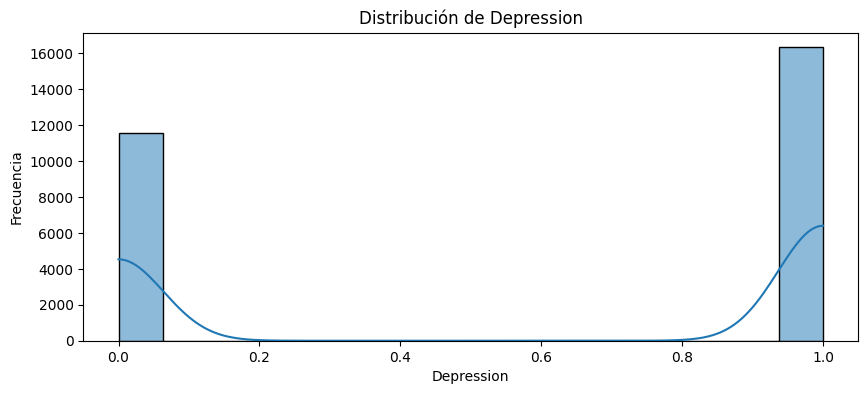

In [35]:
# Histograma de variables numéricas
for col in num_vars:
    plt.figure(figsize=(10,4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribución de {col}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.show()

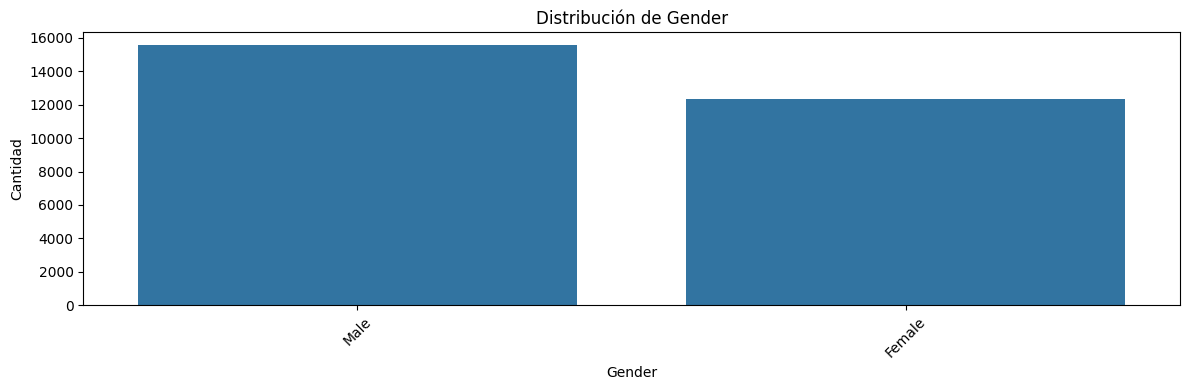

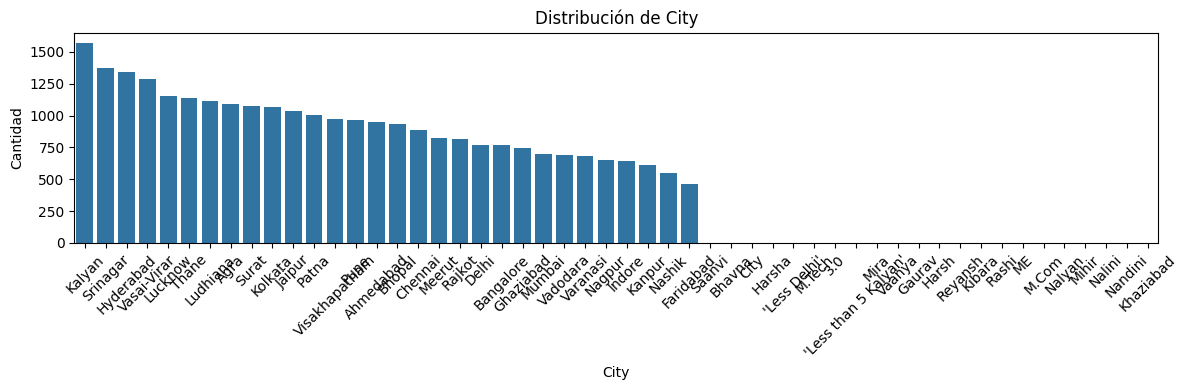

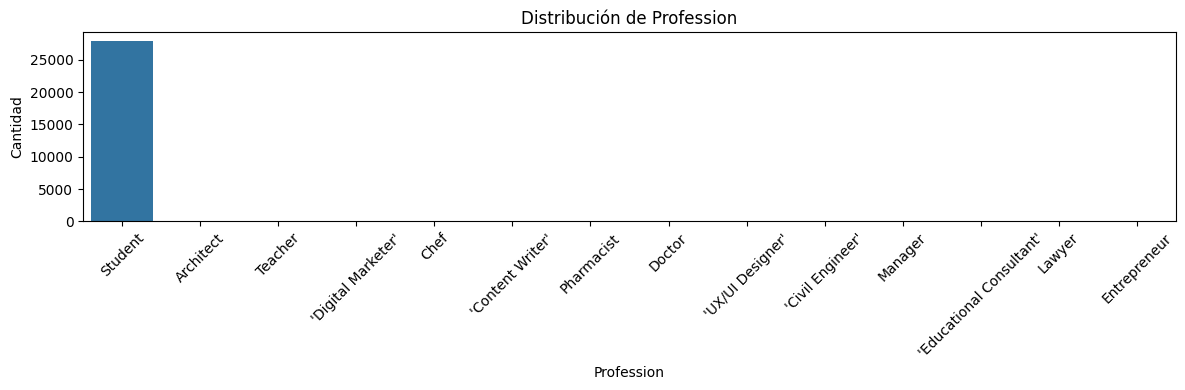

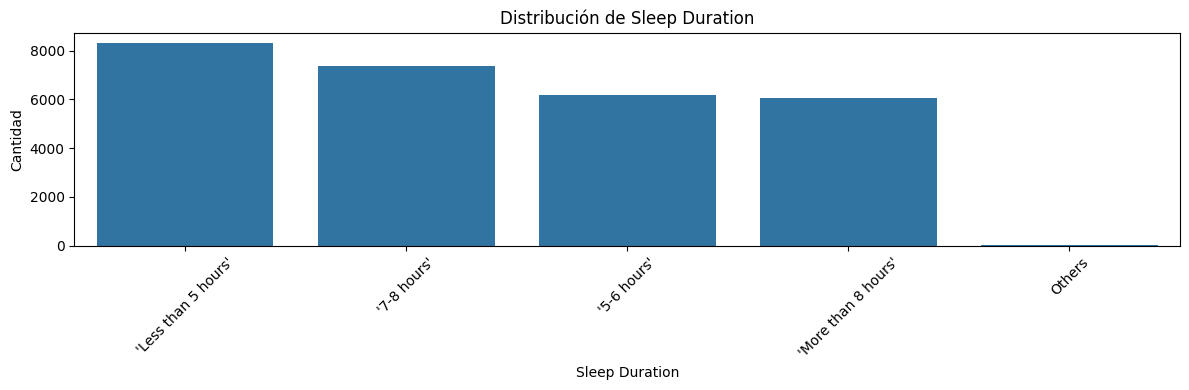

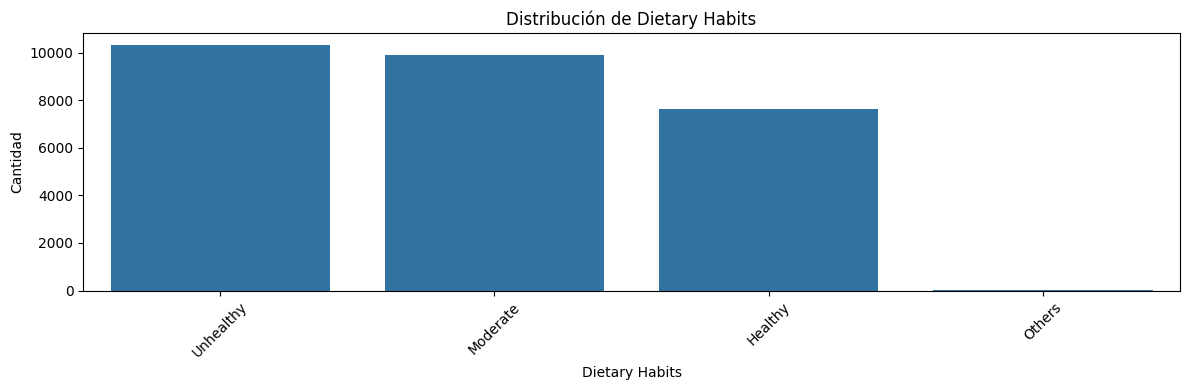

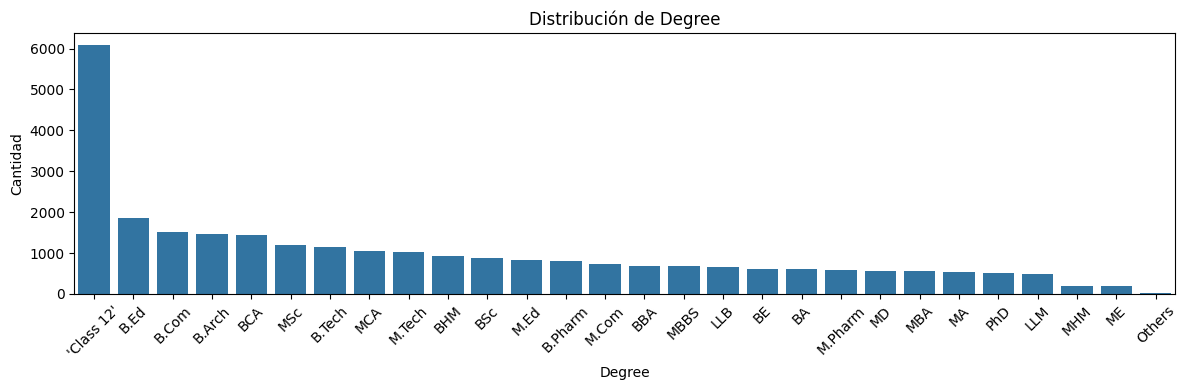

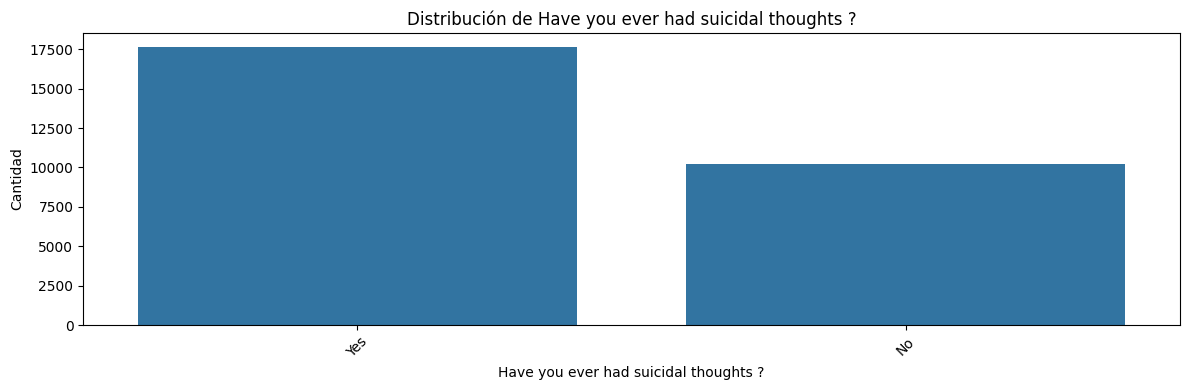

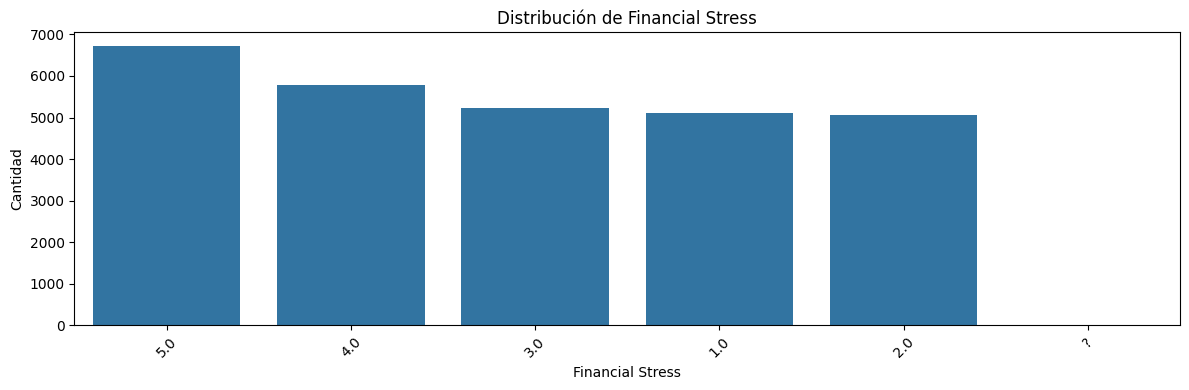

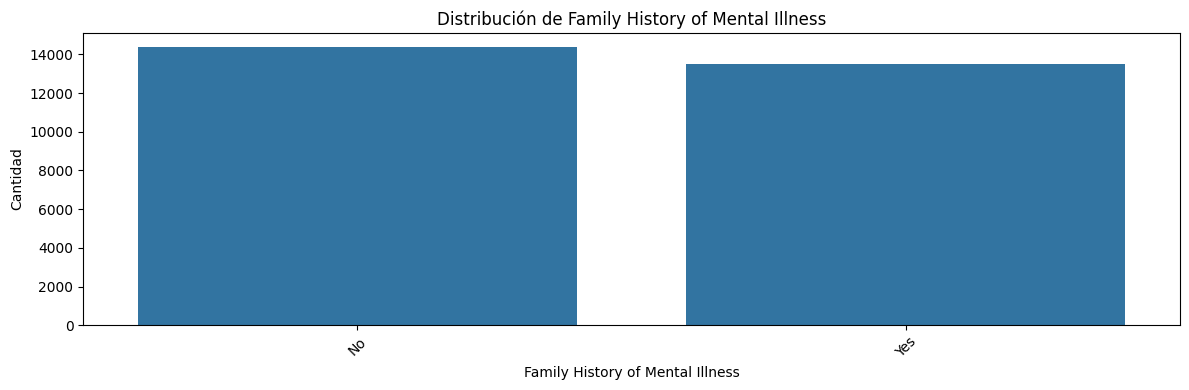

In [44]:
# Conteo de valores para variables categóricas
for col in cat_vars:
    plt.figure(figsize=(12,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f"Distribución de {col}")
    plt.xticks(rotation=45)
    plt.ylabel("Cantidad")
    plt.tight_layout()
    plt.show()

In [ ]:
#Eliminar columna id
df.drop(columns=["id"], inplace=True)

In [ ]:
# Revisar si las columnas Job Satisfaction y Work Pressure contienen solo 0.0
cols_revisar = ["Job Satisfaction", "Work Pressure"]
for col in cols_revisar:
    print(f"Conteo de valores únicos en {col}:")
    print(df[col].value_counts(dropna=False))


Conteo de valores únicos en Job Satisfaction:
Job Satisfaction
0.0    27893
2.0        3
4.0        2
1.0        2
3.0        1
Name: count, dtype: int64
Conteo de valores únicos en Work Pressure:
Work Pressure
0.0    27898
5.0        2
2.0        1
Name: count, dtype: int64


In [ ]:
#Como el 99% de los valores son 0.0 voy a eliminar las columnas ya que no suman informacion al analisis
df.drop(columns=["Job Satisfaction", "Work Pressure"], inplace=True)

In [ ]:
# Regenerar num_vars para que refleje correctamente las columnas actuales del DataFrame, ya que elimine columnas.
num_vars = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

In [ ]:
# Identificar columnas numéricas tipo float que solo contienen enteros
float_int_cols = []

for col in num_vars:
    if df[col].dtype == "float64" and (df[col] % 1 == 0).all():
        float_int_cols.append(col)

print("Columnas float con solo valores enteros (candidatas a convertir a int):")
print(float_int_cols)



Columnas float con solo valores enteros (candidatas a convertir a int):
['Age', 'Academic Pressure', 'Study Satisfaction', 'Work/Study Hours']


In [ ]:
# Ver el contenido de las columnas candidatas a convertir en int
for col in float_int_cols:
    print(f"Contenido de la columna {col}:")
    print(df[[col]].head())  #primeras filas de la columna

Contenido de la columna Age:
    Age
0  33.0
1  24.0
2  31.0
3  28.0
4  25.0
Contenido de la columna Academic Pressure:
   Academic Pressure
0                5.0
1                2.0
2                3.0
3                3.0
4                4.0
Contenido de la columna Study Satisfaction:
   Study Satisfaction
0                 2.0
1                 5.0
2                 5.0
3                 2.0
4                 3.0
Contenido de la columna Work/Study Hours:
   Work/Study Hours
0               3.0
1               3.0
2               9.0
3               4.0
4               1.0


In [ ]:
# Convertir a enteros las columnas analizadas
df[float_int_cols] = df[float_int_cols].astype("int64")

In [ ]:
# Revisar como quedaron las columnas con la trasnformacion realizada.
for col in float_int_cols:
    print(f"Contenido de la columna {col}:")
    print(df[[col]].head())

Contenido de la columna Age:
   Age
0   33
1   24
2   31
3   28
4   25
Contenido de la columna Academic Pressure:
   Academic Pressure
0                  5
1                  2
2                  3
3                  3
4                  4
Contenido de la columna Study Satisfaction:
   Study Satisfaction
0                   2
1                   5
2                   5
3                   2
4                   3
Contenido de la columna Work/Study Hours:
   Work/Study Hours
0                 3
1                 3
2                 9
3                 4
4                 1


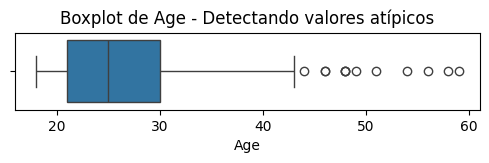

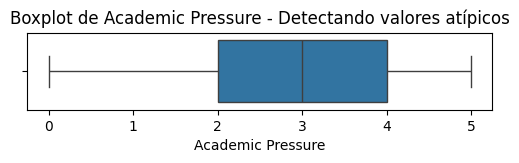

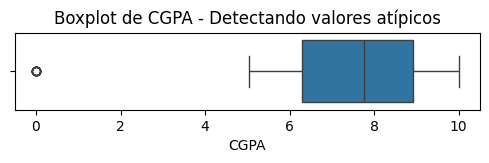

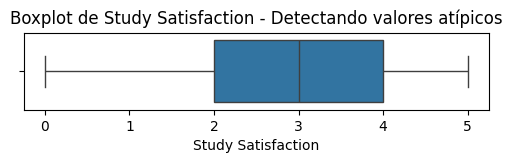

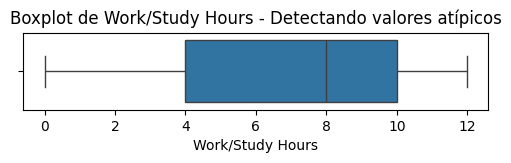

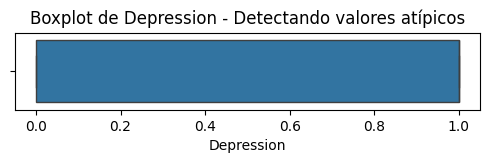

In [42]:
# Detectar valores atípicos con Boxplots para las variables numéricas
for col in num_vars:
    plt.figure(figsize=(6,1))
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot de {col} - Detectando valores atípicos")
    plt.xlabel(col)
    plt.show()
